# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)
btc_response_content_json = btc_response_data.json()
btc_price = int(btc_response_content_json["data"]["1"]["quotes"]["CAD"]["price"])

# Fetch current ETH price
eth_response_data = requests.get(eth_url)
eth_response_content_json = eth_response_data.json()
eth_price = int(eth_response_content_json["data"]["1027"]["quotes"]["CAD"]["price"])


# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $76861.20
The current value of your 5.3 ETH is $29362.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [48]:
# Format current date as ISO format
from datetime import datetime
today = datetime.now().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
bar = api.get_barset(
    tickers, 
    timeframe, 
    start=today, 
    end=today, 
    limit=1000
).df

# Preview DataFrame
bar

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2017-12-18 00:00:00-05:00  109.47  109.4700  109.2500  109.310   3090761   
2017-12-19 00:00:00-05:00  109.14  109.1600  108.8900  109.000   2583809   
2017-12-20 00:00:00-05:00  108.75  108.8800  108.7059  108.770   3123756   
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830   2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880   2952430   
...                           ...       ...       ...      ...       ...   
2021-12-01 00:00:00-05:00  114.27  114.6400  114.2100  114.610  11306707   
2021-12-02 00:00:00-05:00  114.67  114.7900  114.4001  114.610   7507924   
2021-12-03 00:00:00-05:00  114.50  115.2400  114.4600  115.060   7279561   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660   6364620   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475   5783341   

                              SPY                                        
                             open     high       low   close     volume  
time                                                                     
2017-12-18 00:00:00-05:00  268.08  268.600  267.9800  268.18   45691370  
2017-12-19 00:00:00-05:00  268.48  268.530  267.0900  267.22   46990895  
2017-12-20 00:00:00-05:00  268.25  268.330  266.6900  267.04   42133908  
2017-12-21 00:00:00-05:00  267.73  268.385  267.3000  267.57   34999954  
2017-12-22 00:00:00-05:00  267.60  267.635  266.9000  267.48   36604044  
...                           ...      ...       ...     ...        ...  
2021-12-01 00:00:00-05:00  461.64  464.670  450.2900  450.53  112177764  
2021-12-02 00:00:00-05:00  450.72  459.070  450.3100  457.38  109873511  
2021-12-03 00:00:00-05:00  459.17  460.300  448.9200  453.43  124795750  
2021-12-06 00:00:00-05:00  456.14  460.790  453.5600  458.78   88930961  
2021-12-07 00:00:00-05:00  464.41  468.880  458.6546  468.24   79124909  

[1000 rows x 10 columns]

In [49]:
# Pick AGG and SPY close prices
latest_close = bar.tail(1)

agg_close_price = latest_close["AGG"]["close"][0]
spy_close_price = latest_close["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.475
Current SPY closing price: $468.24


In [50]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22895.00
The current value of your 50 SPY shares is $23412.00


### Savings Health Analysis

In [51]:
# Set monthly household income
monthly_income = 12000

#investment totals
crypto_total = my_btc_value + my_eth_value
shares_total = my_agg_value + my_spy_value

# Consolidate financial assets data
investment_type = ["crypto ", "shares "]

# Create savings DataFrame
# Create the shares DataFrame with `tickers` as index
df_savings  = pd.DataFrame(index=[investment_type])
df_savings['amount'] = [crypto_total, shares_total]

# Display savings DataFrame
df_savings

,amount
crypto,106223.2
shares,46307.0


<AxesSubplot:ylabel='amount'>

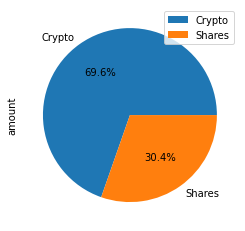

In [52]:
# Plot savings pie chart
labels = 'Crypto', 'Shares'
df_savings.plot.pie(y='amount',subplots=False, autopct='%1.1f%%',labels=labels)

In [53]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Total Savings
total_savings = df_savings["amount"][0] + df_savings["amount"][1]

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations you have more than enough money in your investments in case of an emergency")
elif total_savings == emergency_fund:
    print(f"Congratulations you have reached your financial goal of having enough money in case of emergency")
elif total_savings < emergency_fund:
    print(f"You are ${(round(total_savings-emergency_fund,2)*-1)} away from having enough money in case of emergency") 

Congratulations you have more than enough money in your investments in case of an emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [54]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-07', tz='America/New_York').isoformat()

In [55]:
# Get 5 years' worth of historical data for SPY and AGG

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date, limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-15 00:00:00-05:00  109.42  109.55  109.3150  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.2500  109.31  3090761.0   
2017-12-19 00:00:00-05:00  109.14  109.16  108.8900  109.00  2583809.0   
2017-12-20 00:00:00-05:00  108.75  108.88  108.7059  108.77  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.87  108.7300  108.83  2173058.0   

                              SPY                                       
                             open     high     low   close      volume  
time                                                                    
2017-12-15 00:00:00-05:00     NaN      NaN     NaN     NaN         NaN  
2017-12-18 00:00:00-05:00  268.08  268.600  267.98  268.18  45691370.0  
2017-12-19 00:00:00-05:00  268.48  268.530  267.09  267.22  46990895.0  
2017-12-20 00:00:00-05:00  268.25  268.330  266.69  267.04  42133908.0  
2017-12-21 00:00:00-05:00  267.73  268.385  267.30  267.57  34999954.0

In [57]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40AGG_60SPY_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [58]:
# Print the simulation input data
MC_40AGG_60SPY_dist.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-15 00:00:00-05:00  109.42  109.55  109.3150  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.2500  109.31  3090761.0   
2017-12-19 00:00:00-05:00  109.14  109.16  108.8900  109.00  2583809.0   
2017-12-20 00:00:00-05:00  108.75  108.88  108.7059  108.77  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.87  108.7300  108.83  2173058.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2017-12-15 00:00:00-05:00          NaN     NaN      NaN     NaN     NaN   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.600  267.98  268.18   
2017-12-19 00:00:00-05:00    -0.002836  268.48  268.530  267.09  267.22   
2017-12-20 00:00:00-05:00    -0.002110  268.25  268.330  266.69  267.04   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.30  267.57   

                                                    
                               volume daily_return  
time                                                
2017-12-15 00:00:00-05:00         NaN          NaN  
2017-12-18 00:00:00-05:00  45691370.0          NaN  
2017-12-19 00:00:00-05:00  46990895.0    -0.003580  
2017-12-20 00:00:00-05:00  42133908.0    -0.000674  
2017-12-21 00:00:00-05:00  34999954.0     0.001985

In [59]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40AGG_60SPY_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\AdamF\JLWorkspace\Homework\Week5\Unit-5-Homework-Assignment-Financial-Planning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999010,0.996200,1.001758,1.003501,0.994939,0.994444,1.001358,0.991136,1.009558,0.992158,...,0.993718,1.005816,1.012562,0.994375,0.991375,1.004525,1.001575,0.992481,1.017965,1.003418
2,1.001926,0.996806,0.989554,1.009707,1.000595,0.995311,1.010566,0.998240,1.005932,0.995012,...,0.988045,1.016029,1.015261,0.993418,0.987002,1.008591,0.998534,0.994860,1.013418,1.001053
3,1.003432,1.005795,0.993759,1.009219,1.004145,1.004366,1.014330,0.991166,1.011150,0.997476,...,0.995884,1.021160,1.017700,0.986440,0.992688,1.014698,0.999651,1.006027,1.005233,1.004327
4,1.016616,1.002135,0.998672,1.012423,1.019244,1.011728,1.011391,0.977691,1.007144,0.983625,...,0.997199,1.023857,1.035452,0.994015,0.985584,1.005555,1.002934,1.008921,1.017259,1.007466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,24.073596,14.004266,17.312696,17.053353,31.511445,38.944831,6.319546,26.025985,48.262201,21.965117,...,9.797152,35.682813,10.154032,37.408149,14.663940,144.208039,49.617980,6.722784,44.824679,51.042902
7557,24.136290,14.089341,17.558753,17.287285,31.118904,39.203680,6.298985,26.002097,48.246347,21.657521,...,9.859893,35.535205,10.103862,36.833313,14.689311,142.951403,49.941187,6.672138,44.780733,50.978697
7558,24.413634,14.198471,17.406928,17.321665,31.340365,39.520297,6.249674,25.649178,47.703247,21.651578,...,9.860395,35.466685,10.035397,36.692053,14.740065,142.104401,50.509576,6.705872,45.015753,50.870479
7559,24.580350,14.104875,17.304682,17.187148,31.187116,39.295814,6.357546,25.605574,47.951565,21.761752,...,9.683833,36.208890,10.066868,36.485624,14.903605,141.604563,50.686943,6.656923,45.641710,51.525386


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

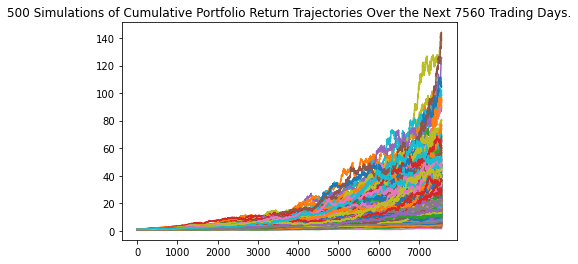

In [60]:
# Plot simulation outcomes
MC_40AGG_60SPY_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

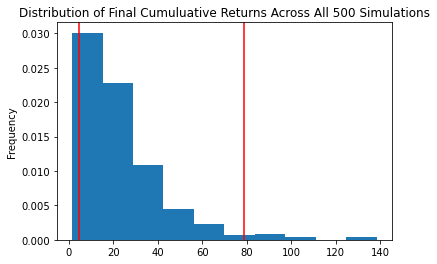

In [61]:
# Plot probability distribution and confidence intervals
MC_40AGG_60SPY_dist.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")